<div style="border-radius:10px; padding: 15px; background-color: #3d0a8a; font-size:130%; text-align:left">

<h2 align="left"><font color=#fcfbff >DECISION TREE CLASSIFIER :</font></h2>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Loading dataset
bank_data = pd.read_csv(r'bank-additional.csv', delimiter=';')
bank_data.rename(columns={'y':"deposit"}, inplace=True)

In [3]:
#showing first 5 rows
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#showing last 5 rows
bank_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
#info about dataset
#dimensions
bank_data.shape

#column names
bank_data.columns

#data types
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [6]:
#different datatypes
bank_data.dtypes.value_counts()

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
#Data cleaning & Preprocessing
#checking for duplicates
bank_data.duplicated().sum()

0

In [8]:
#Descriptive Statistics
bank_data.describe()  #for numeric columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank_data.describe(include="object") #for non-numeric data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


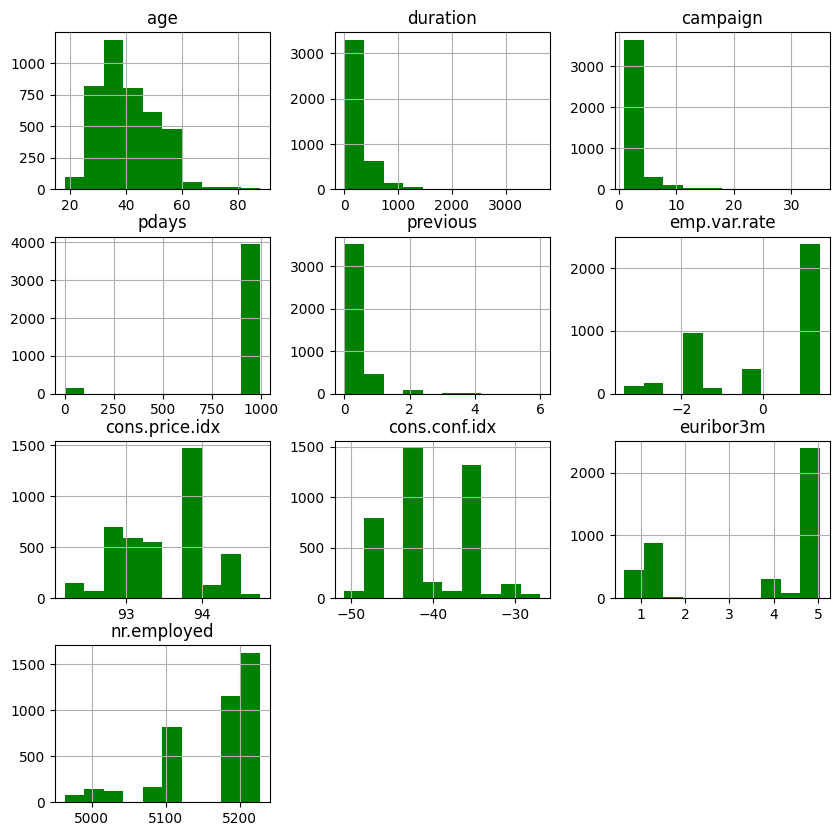

In [10]:
##Data Visualization
bank_data.hist(figsize=(10,10),color="green")
plt.show()

In [11]:
#extracting numerical and categorical columns
categorical = bank_data.select_dtypes(include='object').columns
print(categorical)

numerical = bank_data.select_dtypes(exclude='object').columns
print(numerical)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


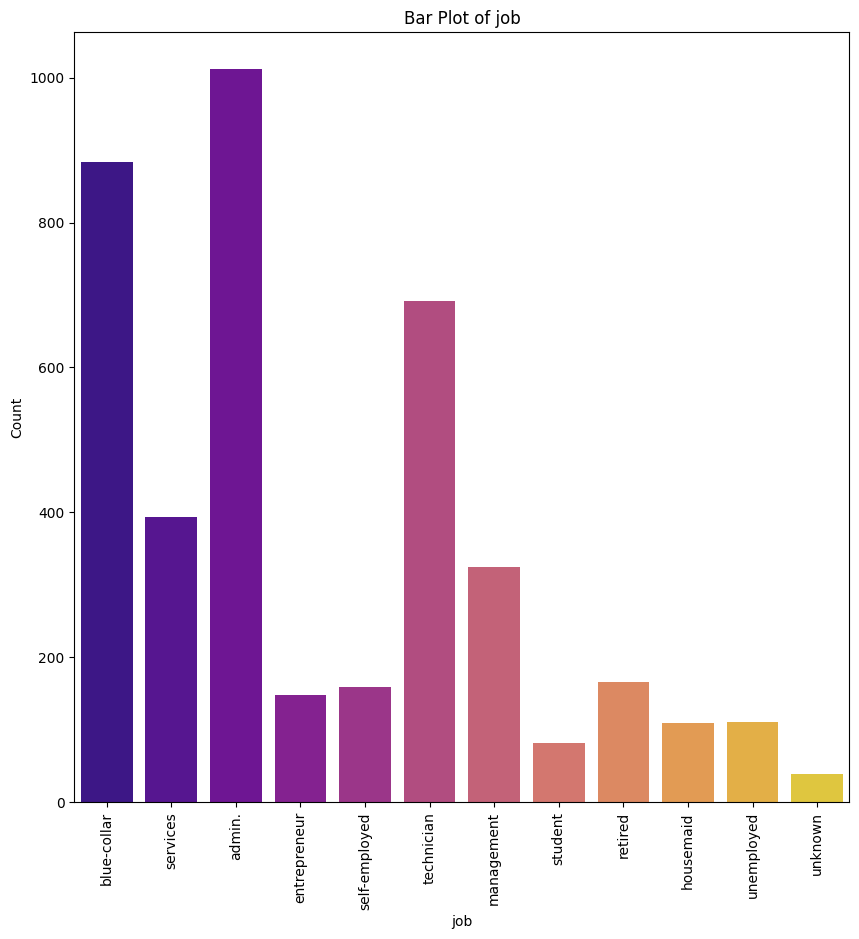

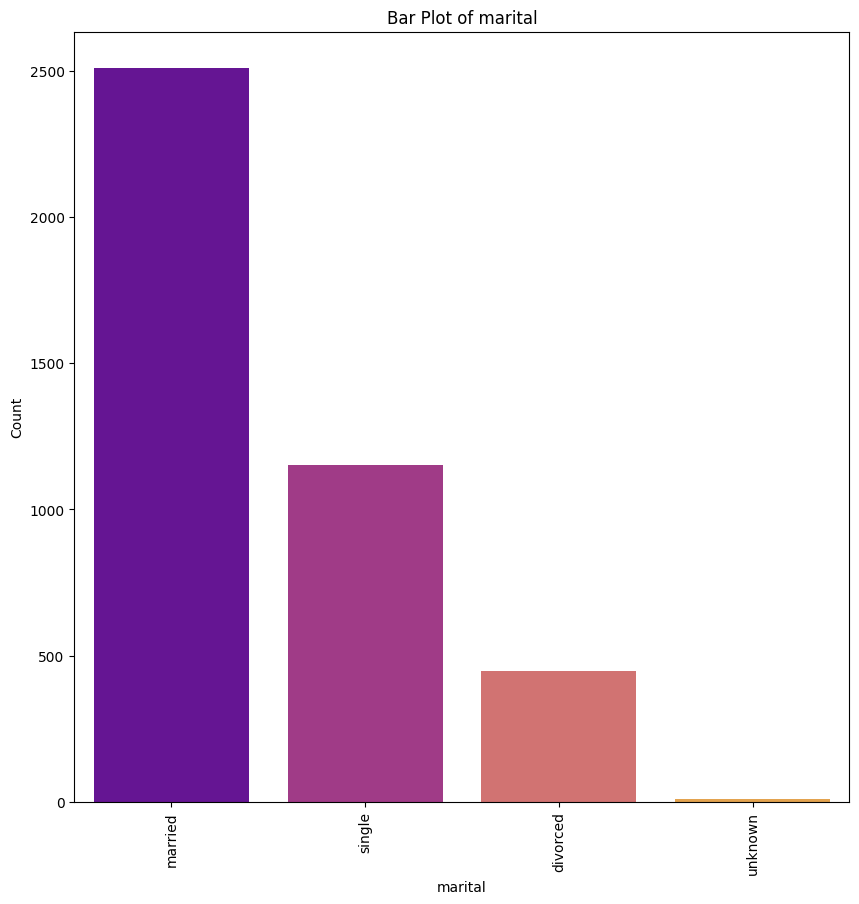

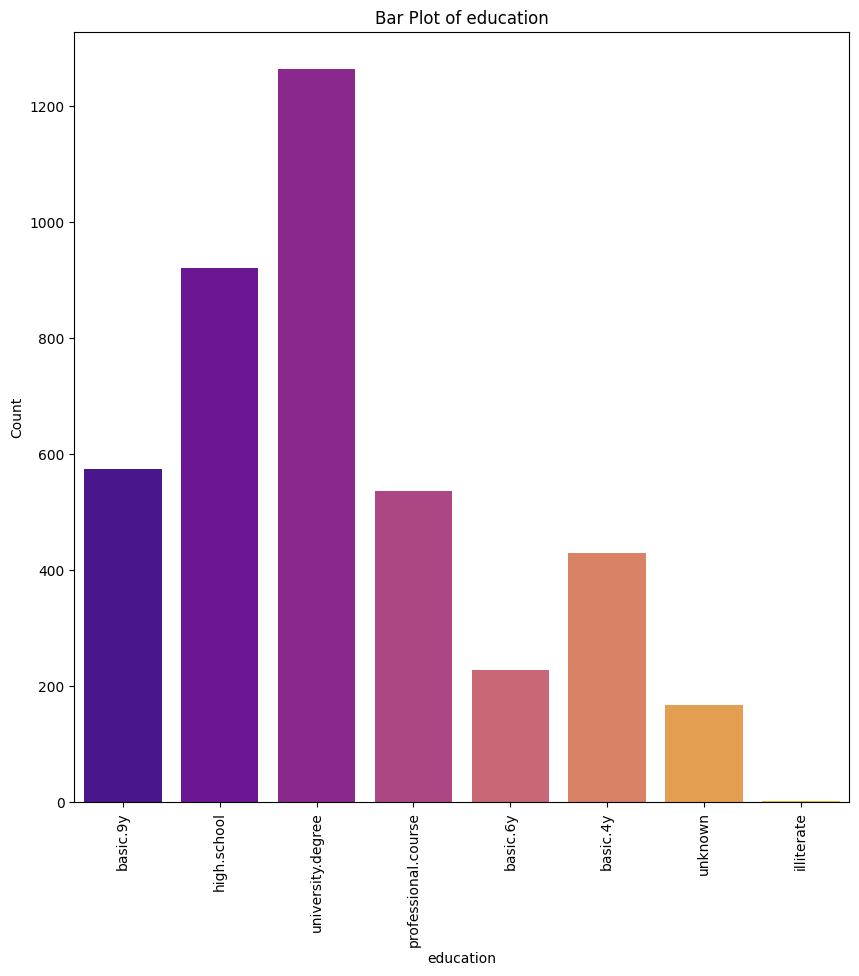

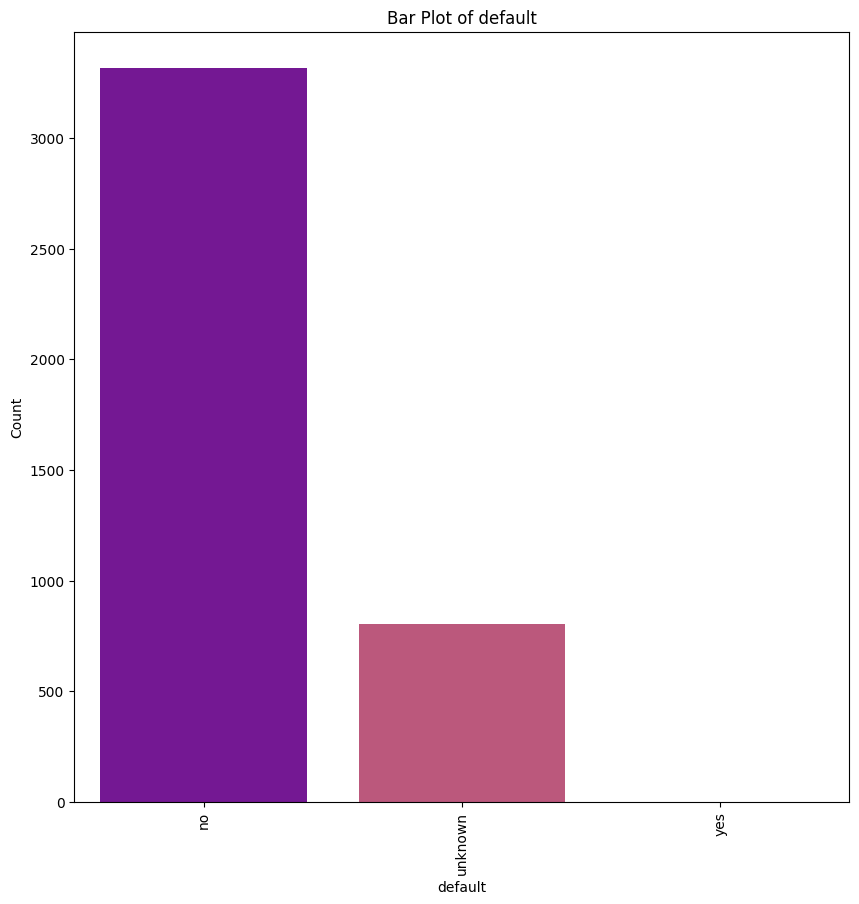

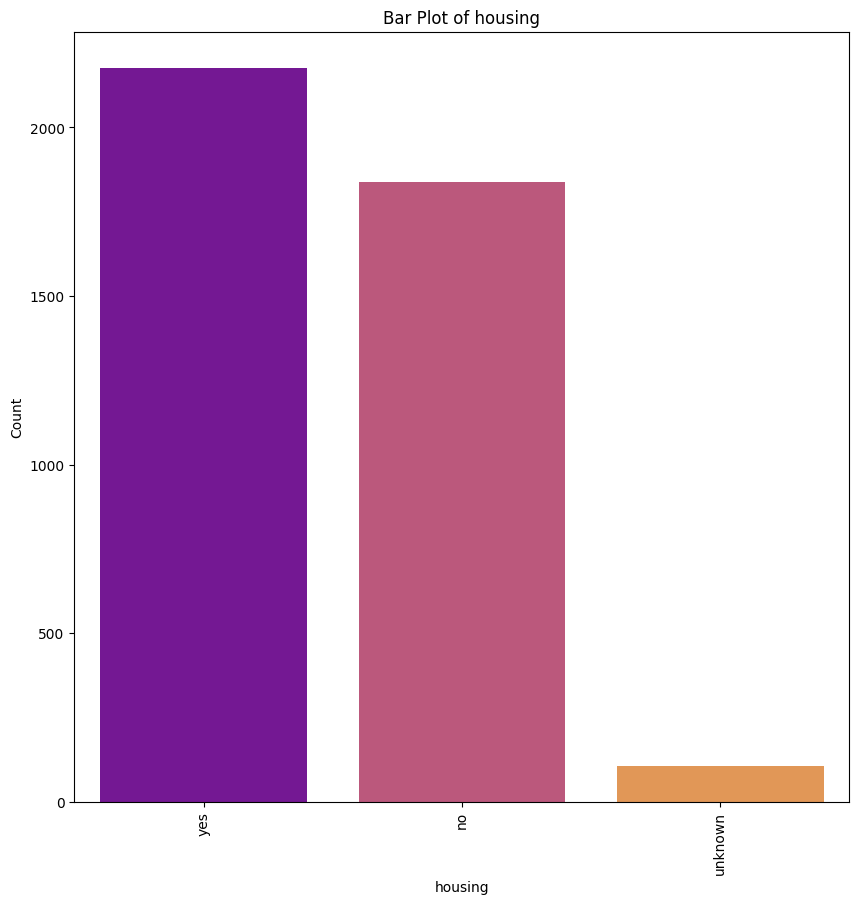

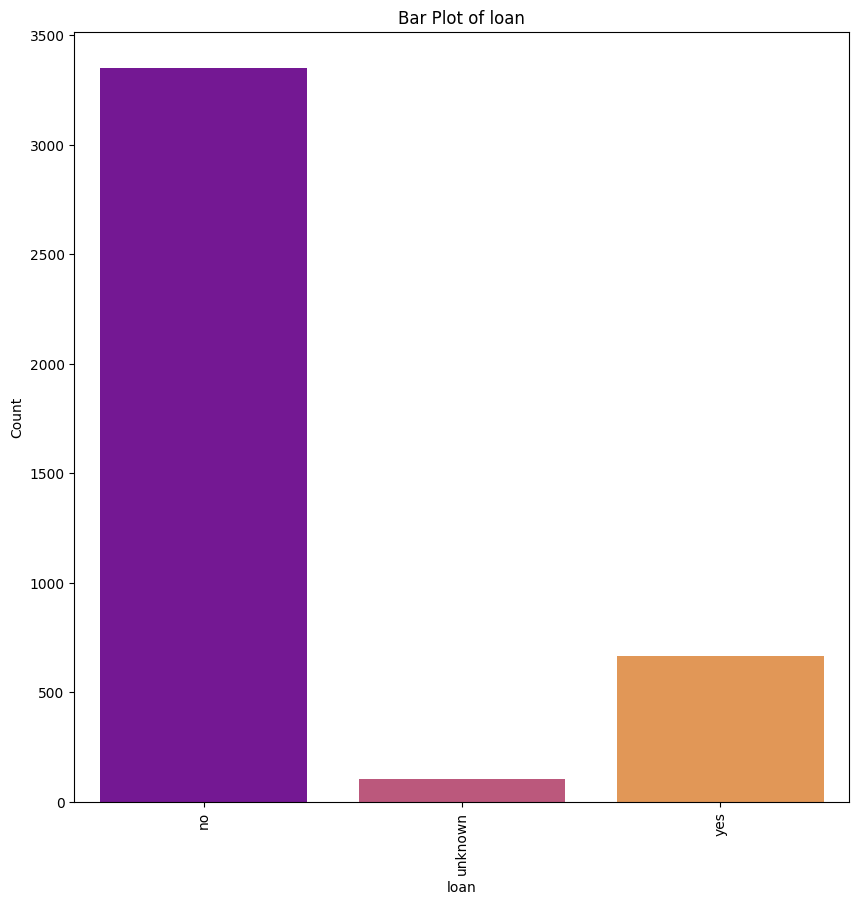

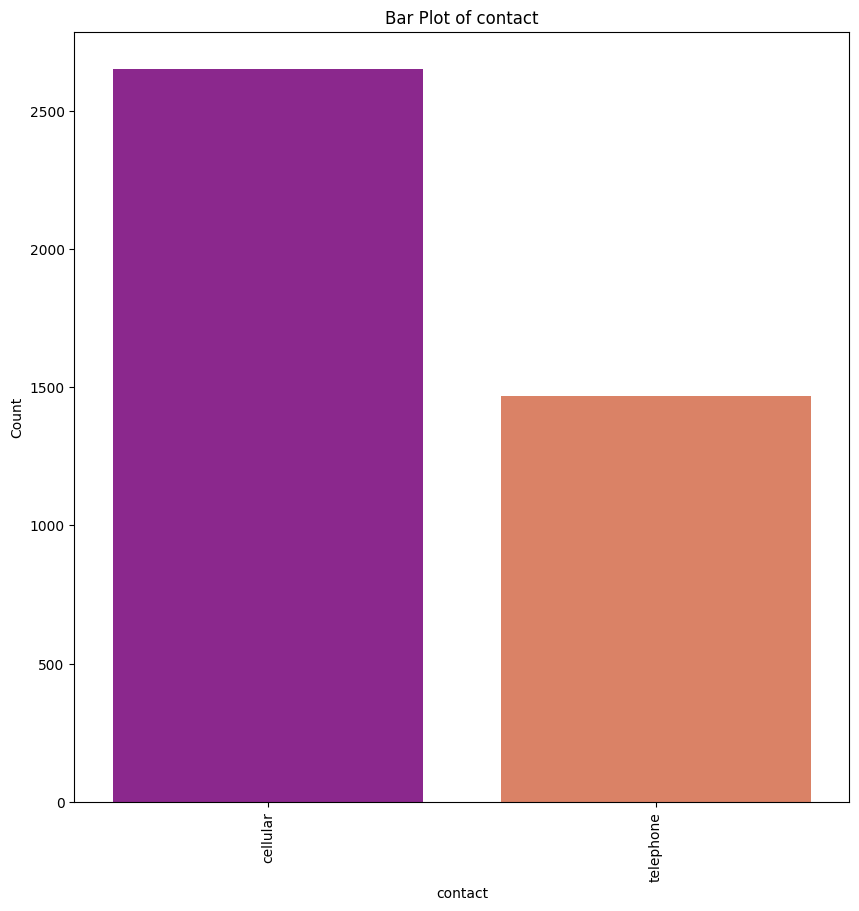

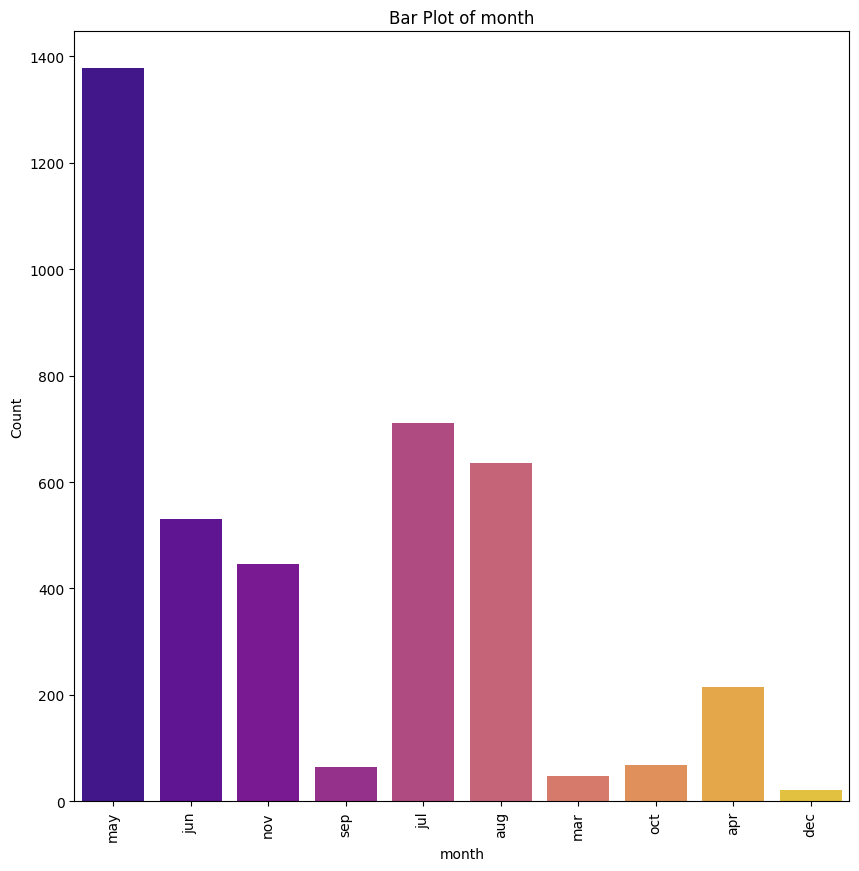

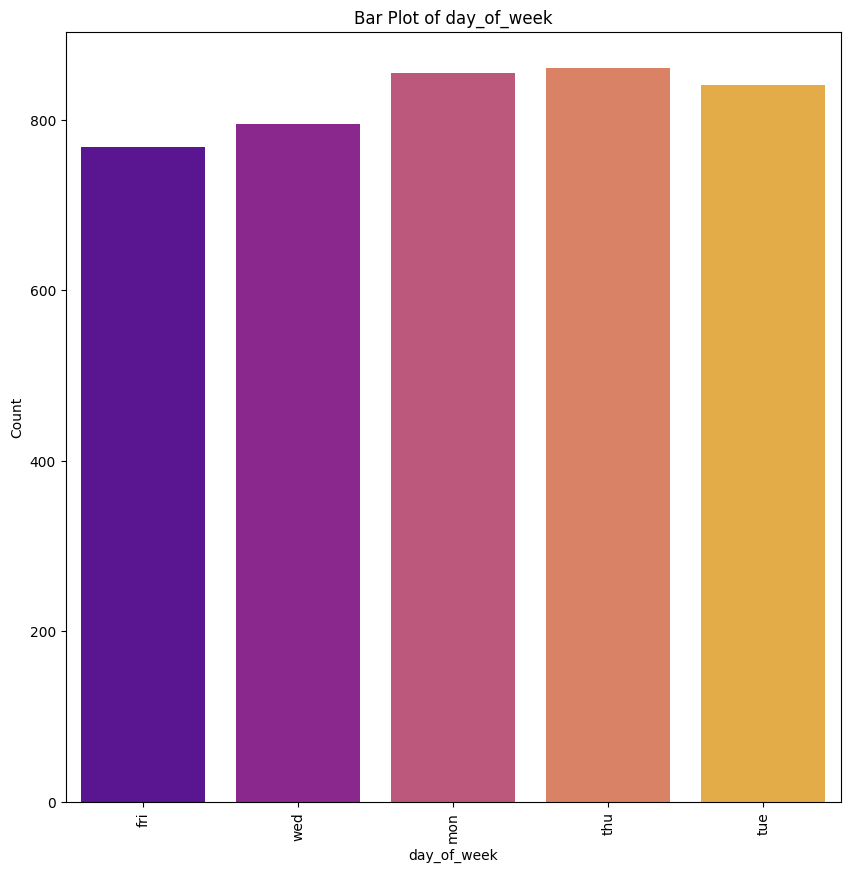

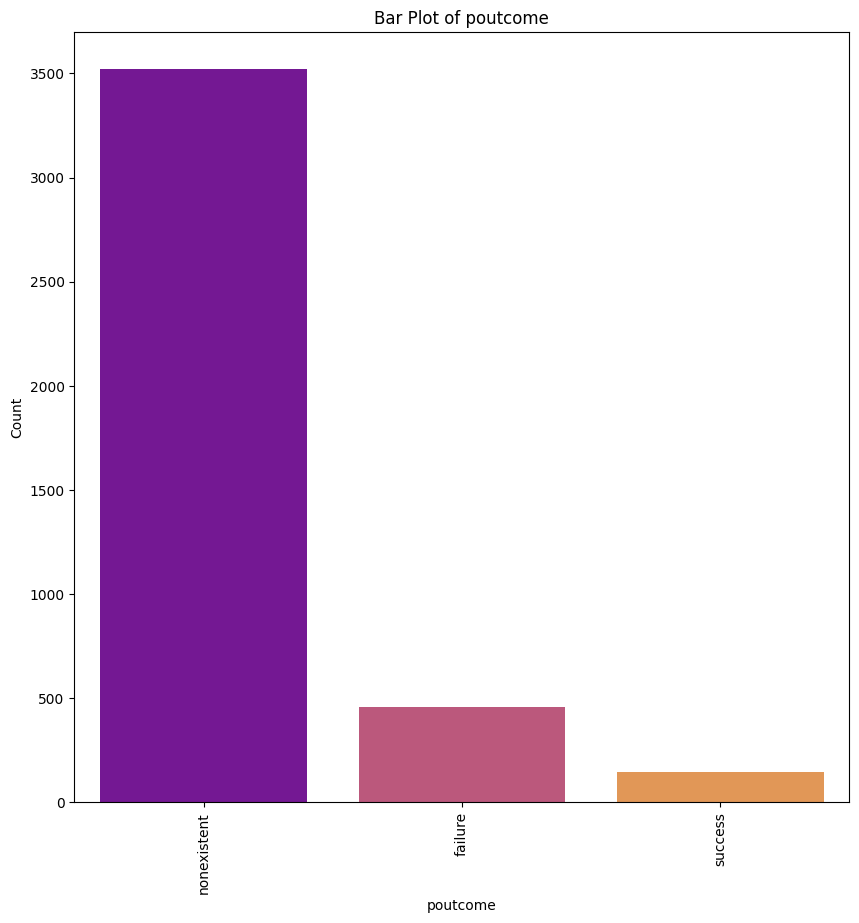

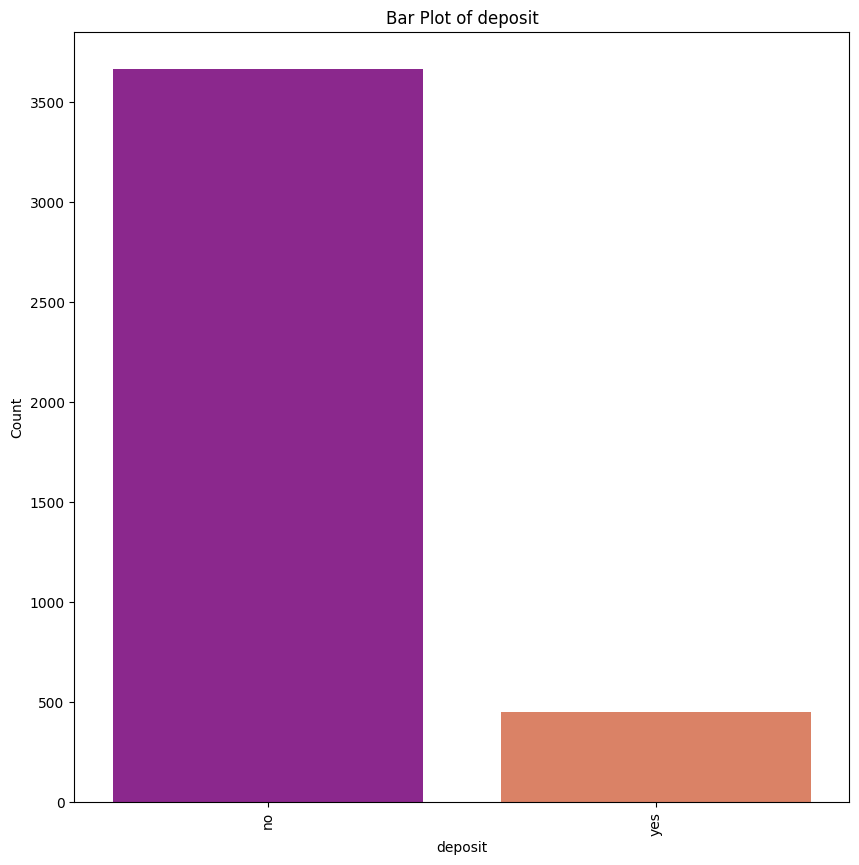

In [12]:
#Visualize categorical columns using barplot
for  attribute in categorical:
    plt.figure(figsize=(10,10))  
    sns.countplot(x=attribute, data=bank_data, palette='plasma')
    plt.title(f'Bar Plot of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

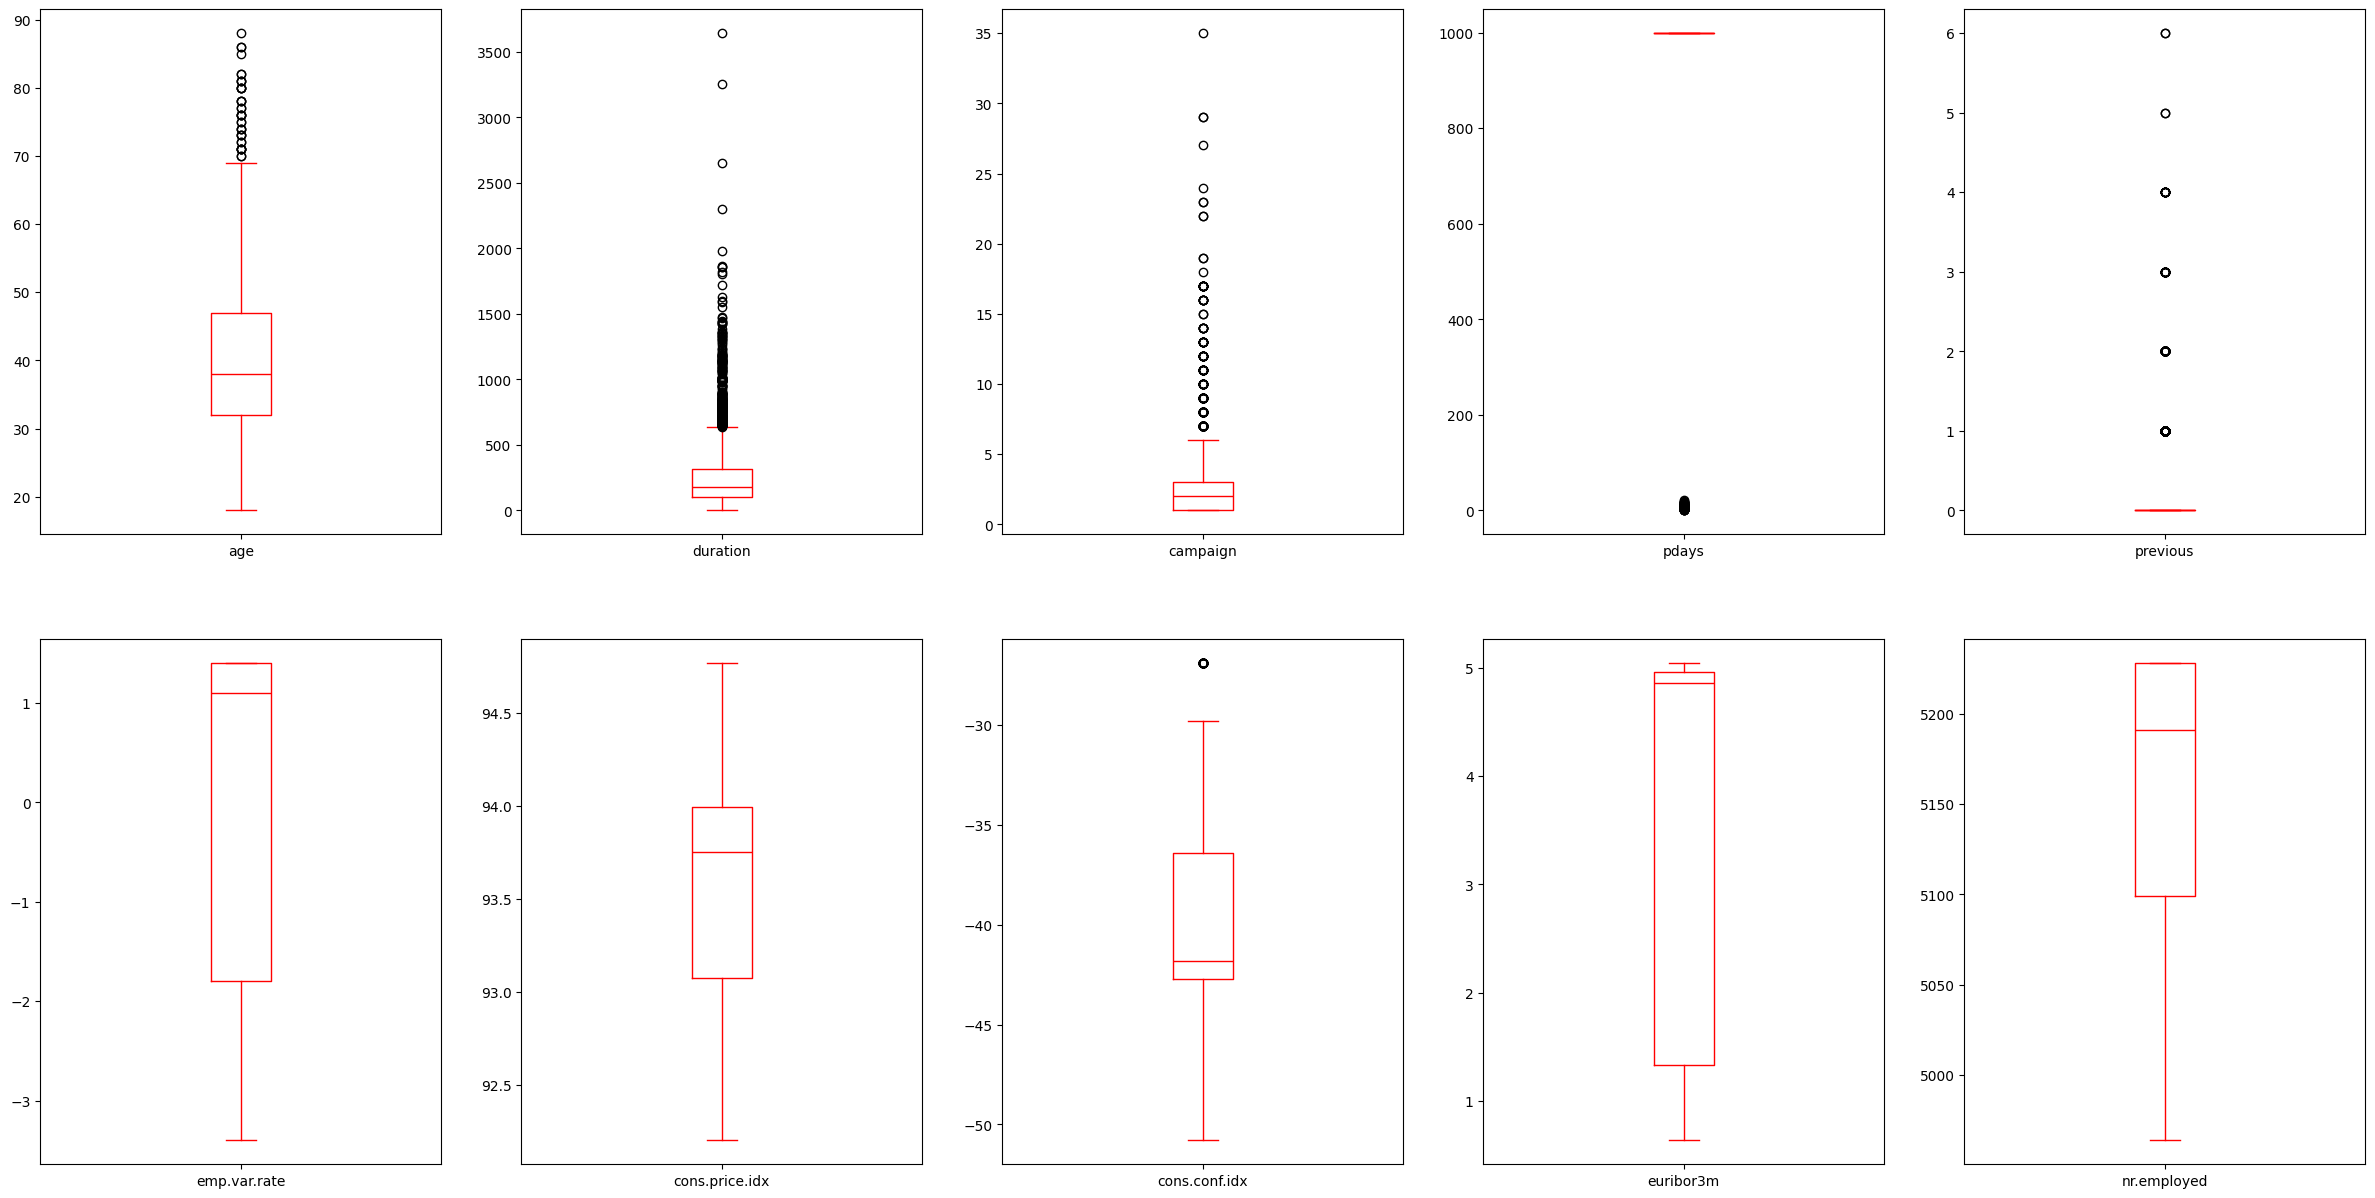

In [13]:
#plot boxplot and check for outliers
bank_data.plot(kind="box",subplots=True,figsize=(30,15),color="red",layout=(2,5))
plt.show()

In [14]:
#there are 3 columns having outliers - age, duration and campaign. so remove the outliers by IQR.


Col = bank_data[['age','campaign','duration']]
Q1 = np.percentile(Col, 25)
Q3 = np.percentile(Col, 75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
bank_data[['age','campaign','duration']] = Col[(Col > Lower_bound) & (Col < Upper_bound)]

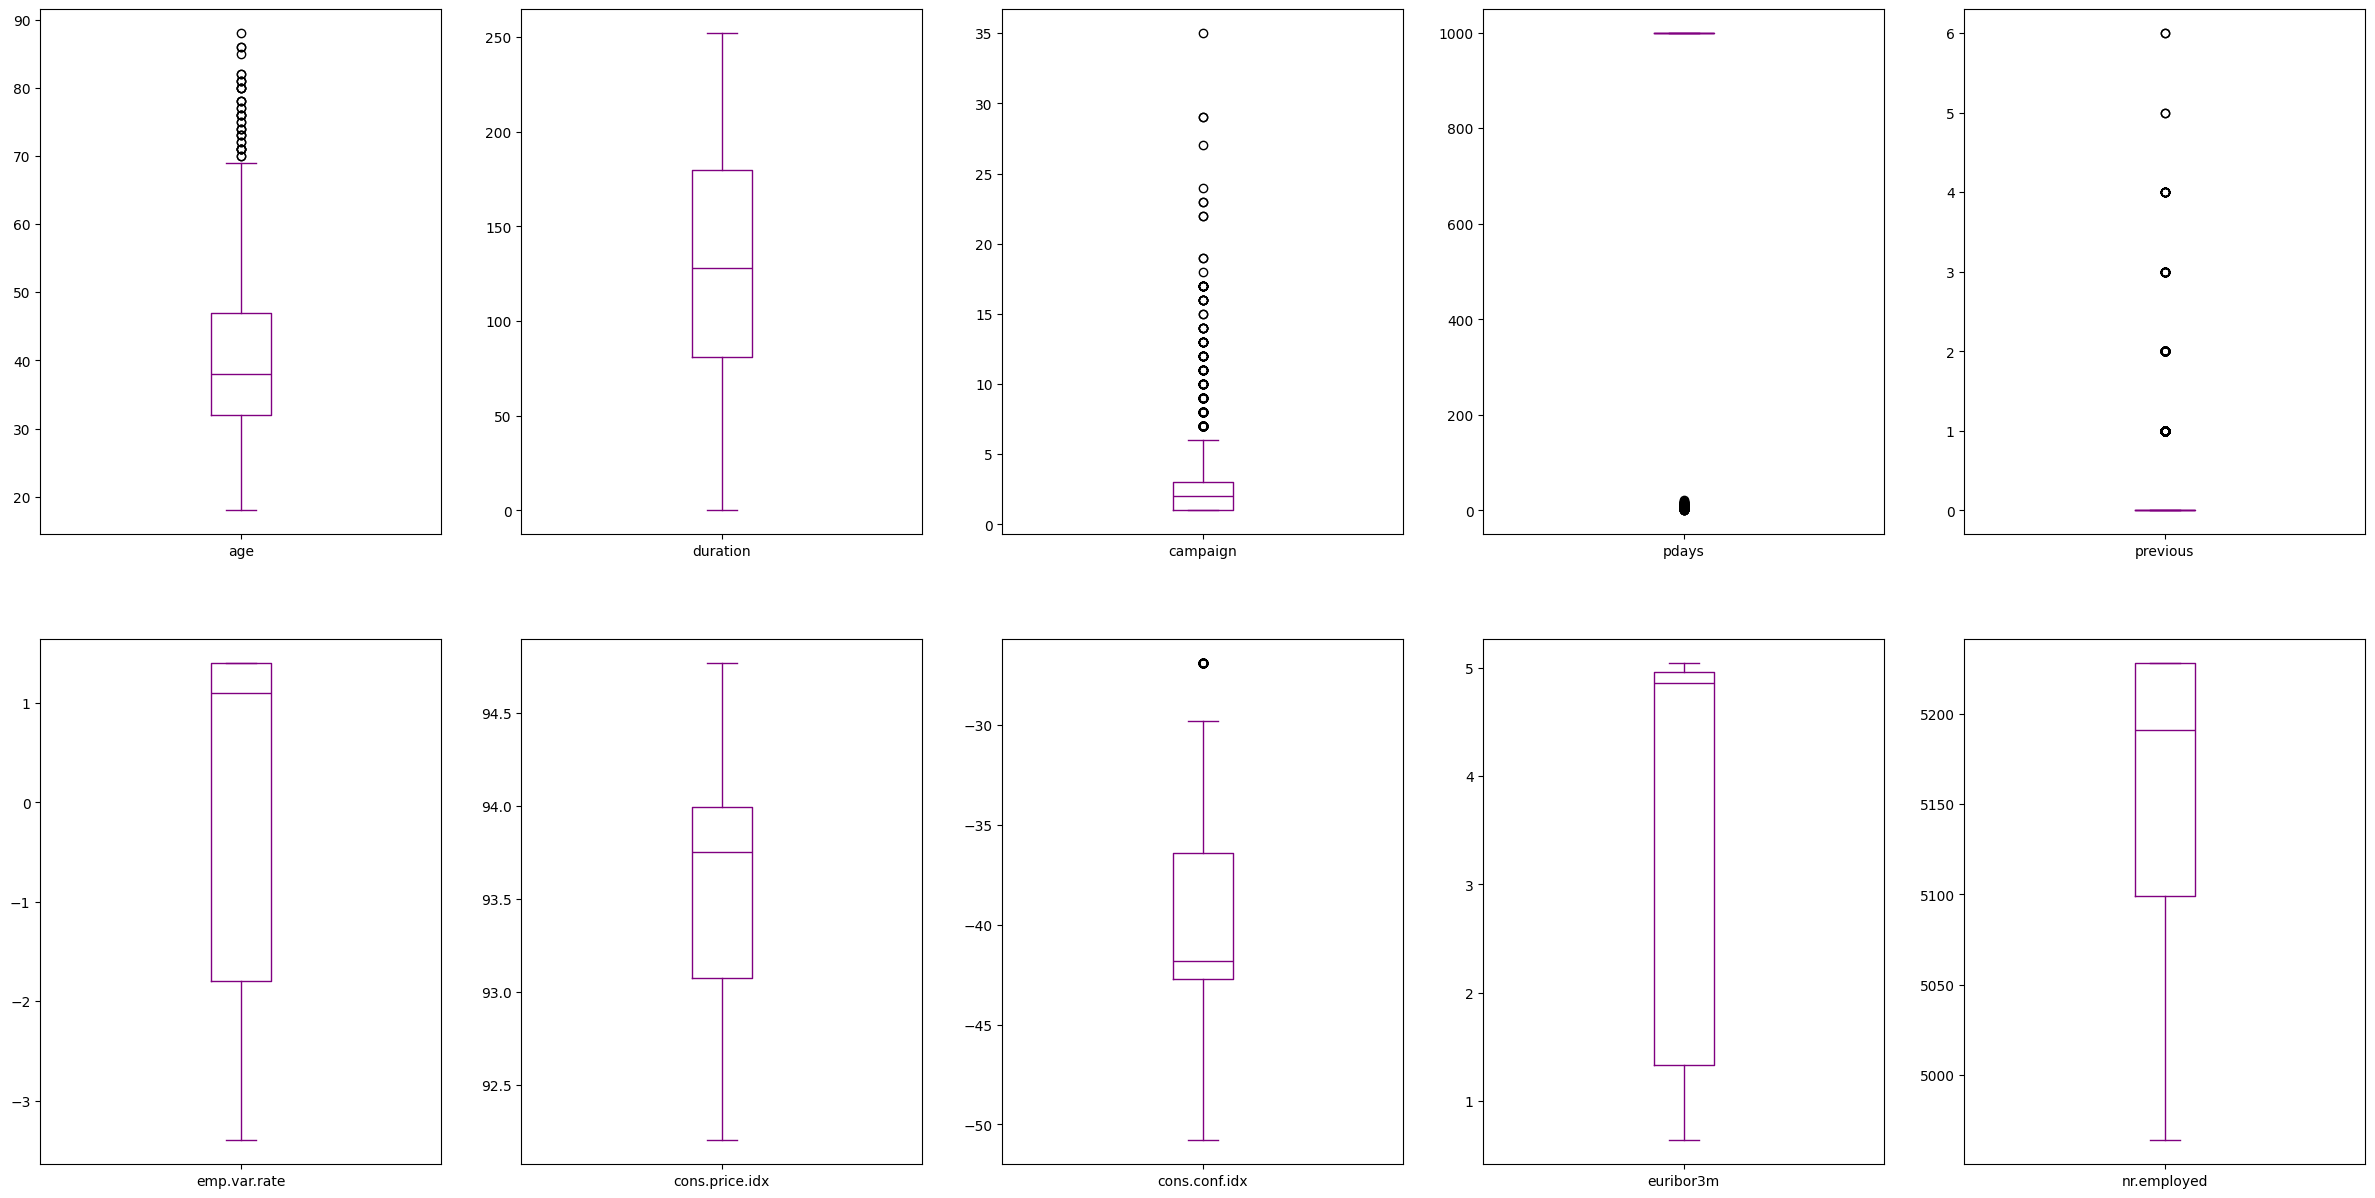

In [15]:
#Plotting again boxplots
bank_data.plot(kind="box",subplots=True,figsize=(30,15),color="purple",layout=(2,5))
plt.show()

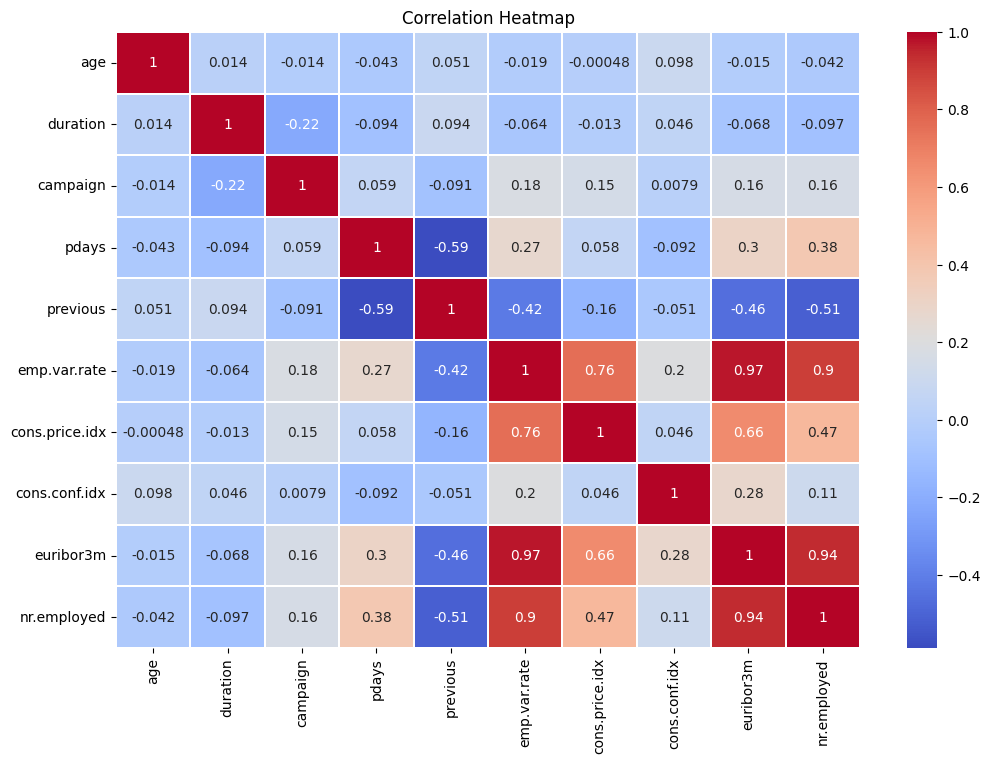

In [16]:
#Correlation using correlation heatmap

# Filter out non-numeric columns for correlation calculation
numeric_columns = bank_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#Choosing highly correlated variables
High_Correlation = ["emp.var.rate","euribor3m","nr.employed"]

In [18]:
#copy with original dataset
bank_data1 = bank_data.copy()
bank_data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [19]:
#Removing highly correlated variables from the data
bank_data1.drop(High_Correlation,inplace=True,axis=1)  # axis=1 indicates columns
bank_data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [20]:
bank_data1.shape

(4119, 18)

In [21]:
#Converting categorical variables into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
Label_encoding = LabelEncoder()
bank_data_encoded = bank_data1.apply(Label_encoding.fit_transform)
bank_data_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,250,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,250,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,250,0,20,0,1,13,17,0


In [22]:
#identifying target variables
bank_data_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [23]:
#selecting independent & dependent variables
x = bank_data_encoded.drop('deposit',axis=1)  # independent variable
y = bank_data_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
#splitting dataset into train and test datasets
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [26]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    Accuracy = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',Accuracy)
    Confusion_mat = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',Confusion_mat)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  # Training Accuracy
    print('Testing Score',test_score)    # Testing Accuracy

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree Classifier Model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
decision_tree.fit(x_train, y_train)

# Display the model configuration
print(decision_tree)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)


In [29]:
#evaluating training and testing accuracy
mscore(Decision_Tree)

Training Score 0.9148591777274199
Testing Score 0.8990291262135922


In [30]:
# Generating prediction
ypred_Decision_Tree = Decision_Tree.predict(x_test)
print(ypred_Decision_Tree)

[0 0 1 ... 0 0 0]


In [31]:
# Evaluate the model - confusion matrix, classification Report, Accuaracy
eval_model(y_test,ypred_Decision_Tree)            

Accuracy_Score 0.8990291262135922
Confusion Matrix
 [[905  25]
 [ 79  21]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       930
           1       0.46      0.21      0.29       100

    accuracy                           0.90      1030
   macro avg       0.69      0.59      0.62      1030
weighted avg       0.87      0.90      0.88      1030



In [32]:
#Plot Decision Tree
from sklearn.tree import plot_tree

class_name = ['no','yes']
feature_name = x_train.columns
print(class_name)
print(feature_name)

['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


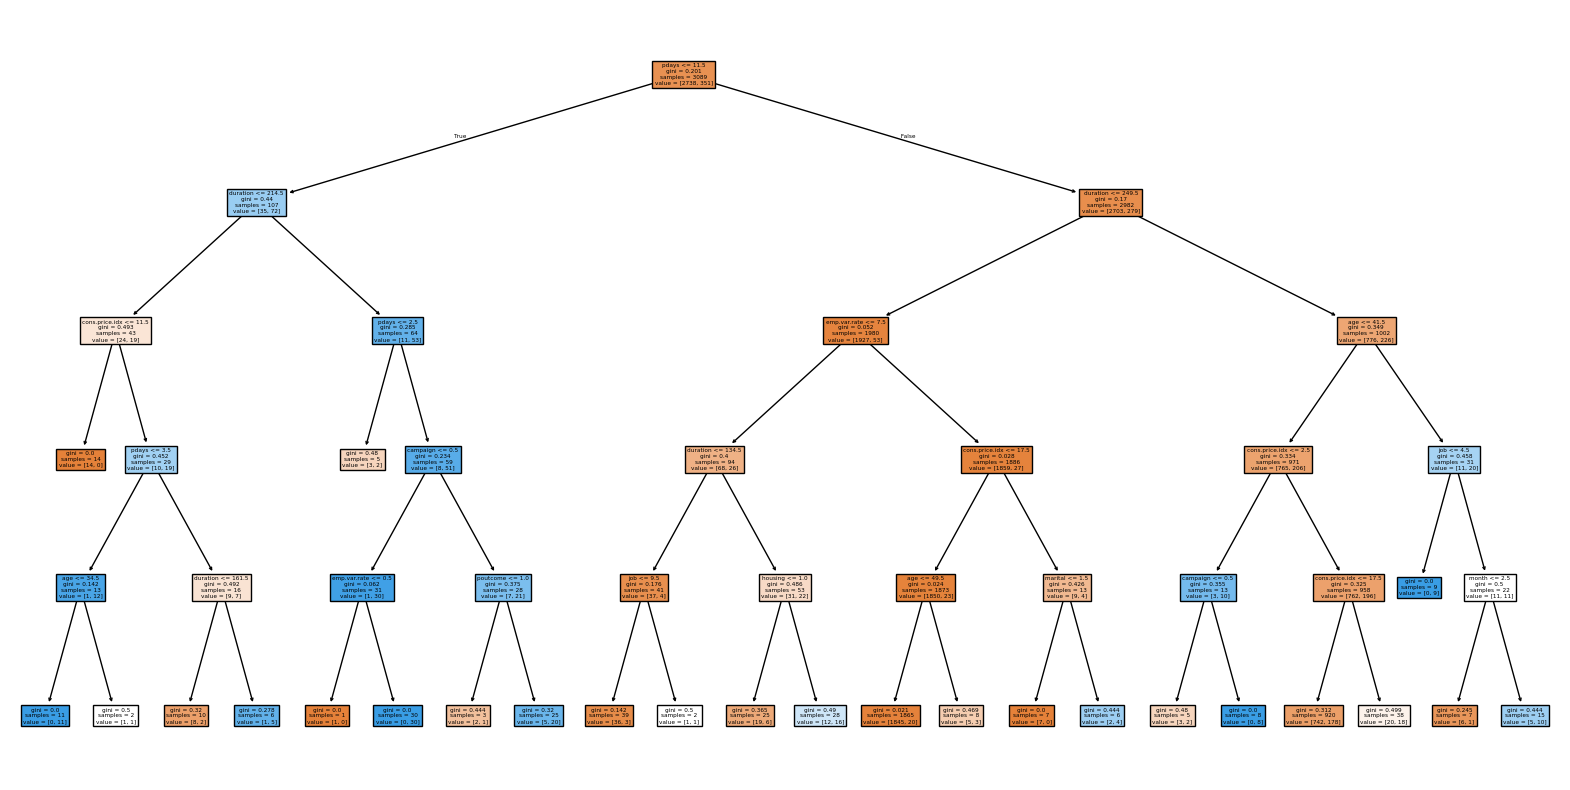

In [43]:
# Convert the DataFrame index to a list
feature_name = bank_data.columns.tolist()

# Create the figure and plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(Decision_Tree, feature_names=feature_name, filled=True)

# Show the decision tree plot
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree Classifier Model using 'entropy'
decision_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
decision_tree1.fit(x_train, y_train)

# Display the model configuration
print(decision_tree1)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)


In [38]:
mscore(Decision_Tree1)

Training Score 0.9080608611201036
Testing Score 0.9048543689320389


In [39]:
ypred_Decision_Tree1 = Decision_Tree1.predict(x_test)
eval_model(y_test,ypred_Decision_Tree1)

Accuracy_Score 0.9048543689320389
Confusion Matrix
 [[915  15]
 [ 83  17]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.53      0.17      0.26       100

    accuracy                           0.90      1030
   macro avg       0.72      0.58      0.60      1030
weighted avg       0.88      0.90      0.88      1030



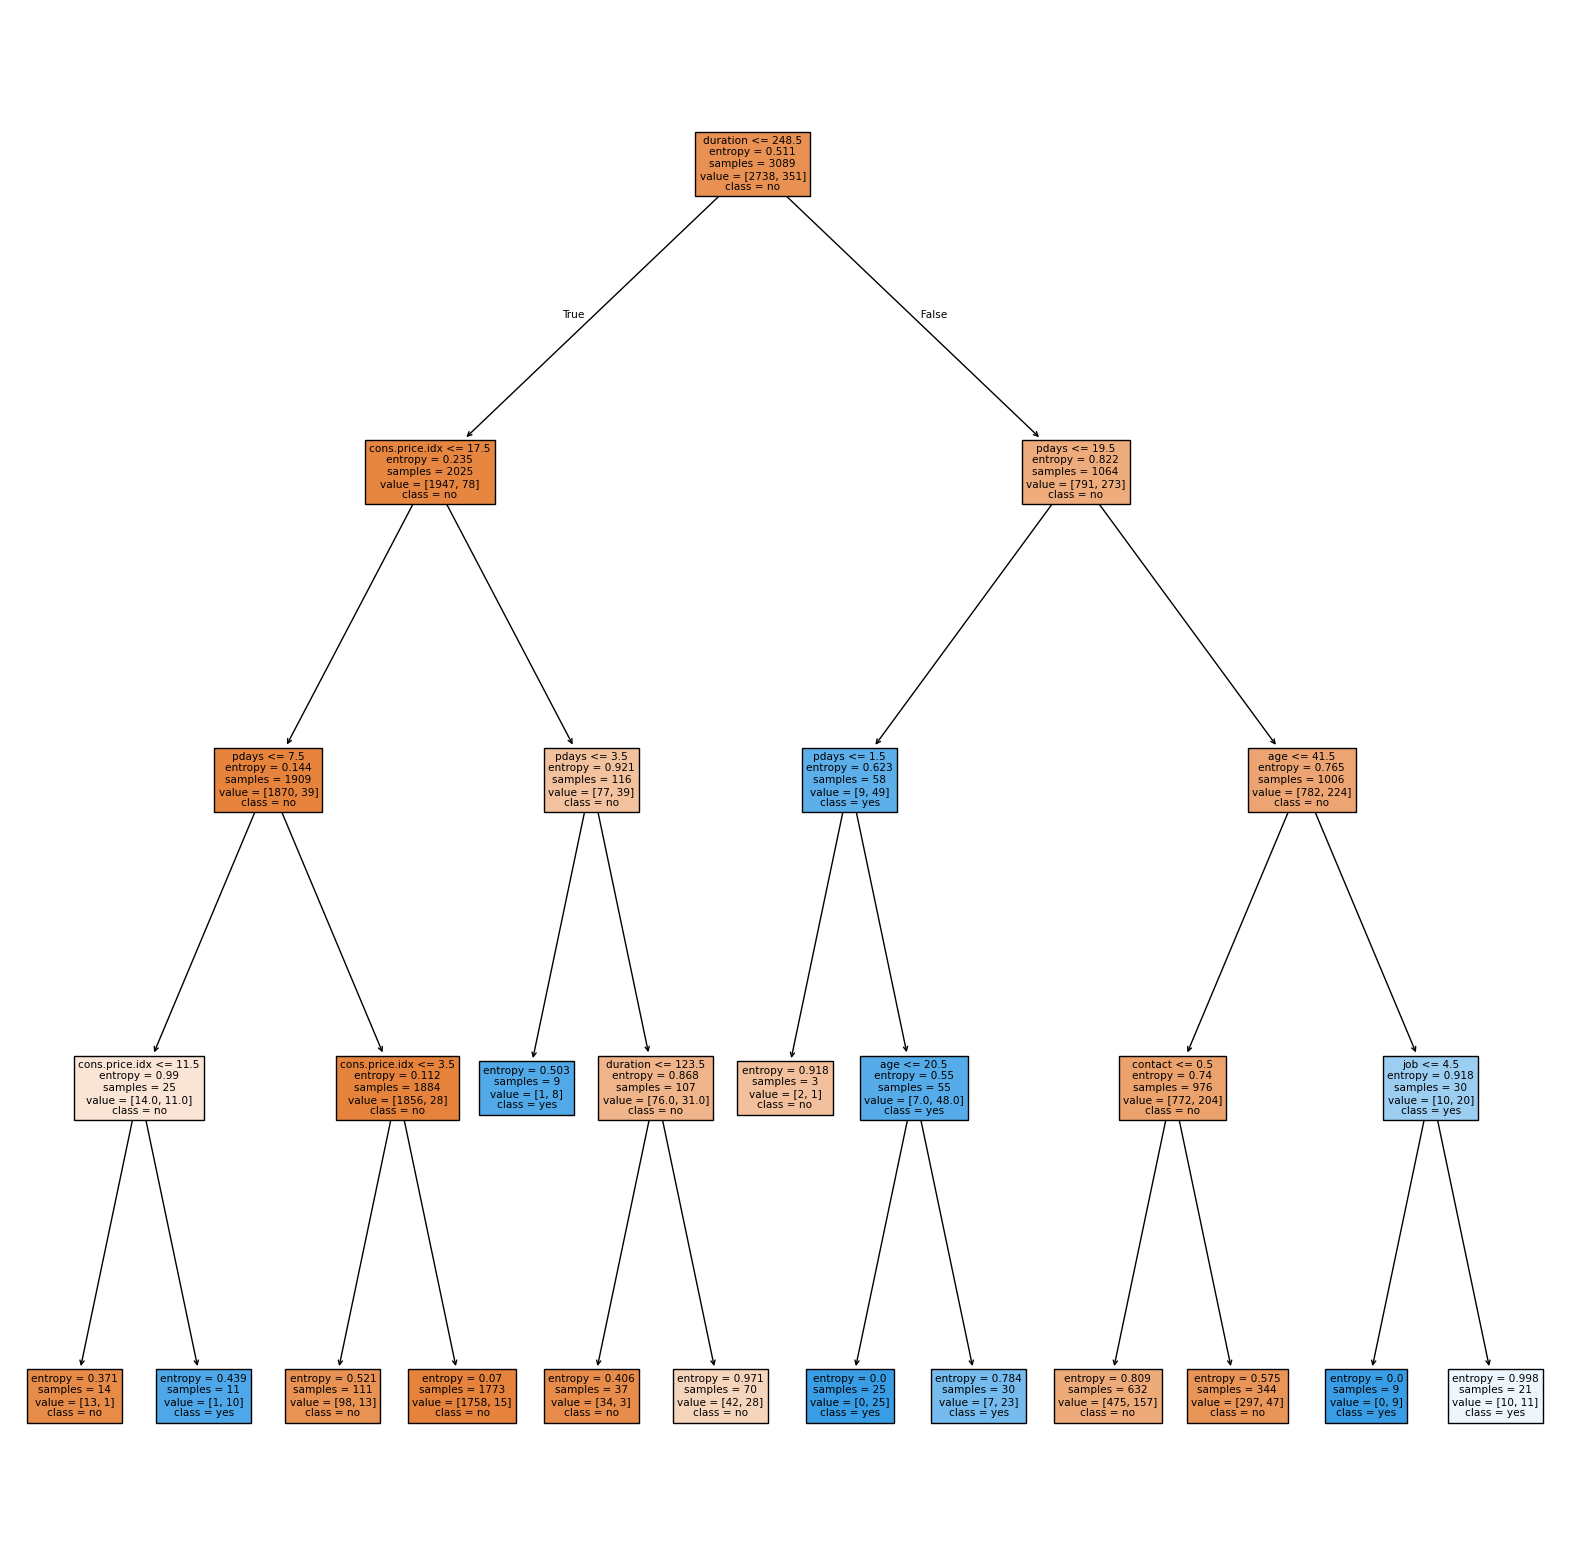

In [40]:
plt.figure(figsize=(20,20))
plot_tree(Decision_Tree1,feature_names=feature_name,class_names=class_name,filled=True)
plt.show()

Conclusion: The above dataset is a subset of the population dataset of "BANK MARKETING". 

1.In this dataset, there are total 4119 rows and 21 columuns

2.The final results got the 90% accuracy and the decison tree as above. the goal was to predicrt if the customer will purchase a product
 or service based on their demographic and behavioral data. dataset has 20 features and 1 target vaeiable i.e. "deposit".
 
3.After data cleaning and preprocessing and model selection, model building has done. so, as per the task, I built decision tree classifier model
 and evaluated the accuracy of the model i.e. we can say that the model is the good fit for the given dataset after the claeaning and model building.

In [41]:
# end of DECISION TREE CLASSIFIER